In [15]:
import numpy as np  # numpy for math
import pandas as pd     # for dataframes and csv files
import matplotlib.pyplot as plt  # for plotting
from matplotlib import animation  # animate 3D plots
from mpl_toolkits.mplot3d import Axes3D  # 3D plots

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import manifold

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras

In [3]:
items_csv = pd.read_excel('partdata.xlsx')
items_features = items_csv.copy().dropna()
items_features.pop('time')
items_features.pop('status')

In [16]:
# Create the preprocessing layer
inputs = {}
for name, column in items_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'col1': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col1')>,
 'col10': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col10')>,
 'col11': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col11')>,
 'col12': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col12')>,
 'col13': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col13')>,
 'col14': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col14')>,
 'col15': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col15')>,
 'col16': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col16')>,
 'col17': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col17')>,
 'col18': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col18')>,
 'col19': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col19')>,
 'col2': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'col2')>,
 'col20'

In [17]:
# deal with numeric features
numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(items_features[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
preprocessed_inputs = [all_numeric_inputs]

all_numeric_inputs

<KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'normalization')>

In [23]:
all_numeric_inputs

<KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'normalization')>

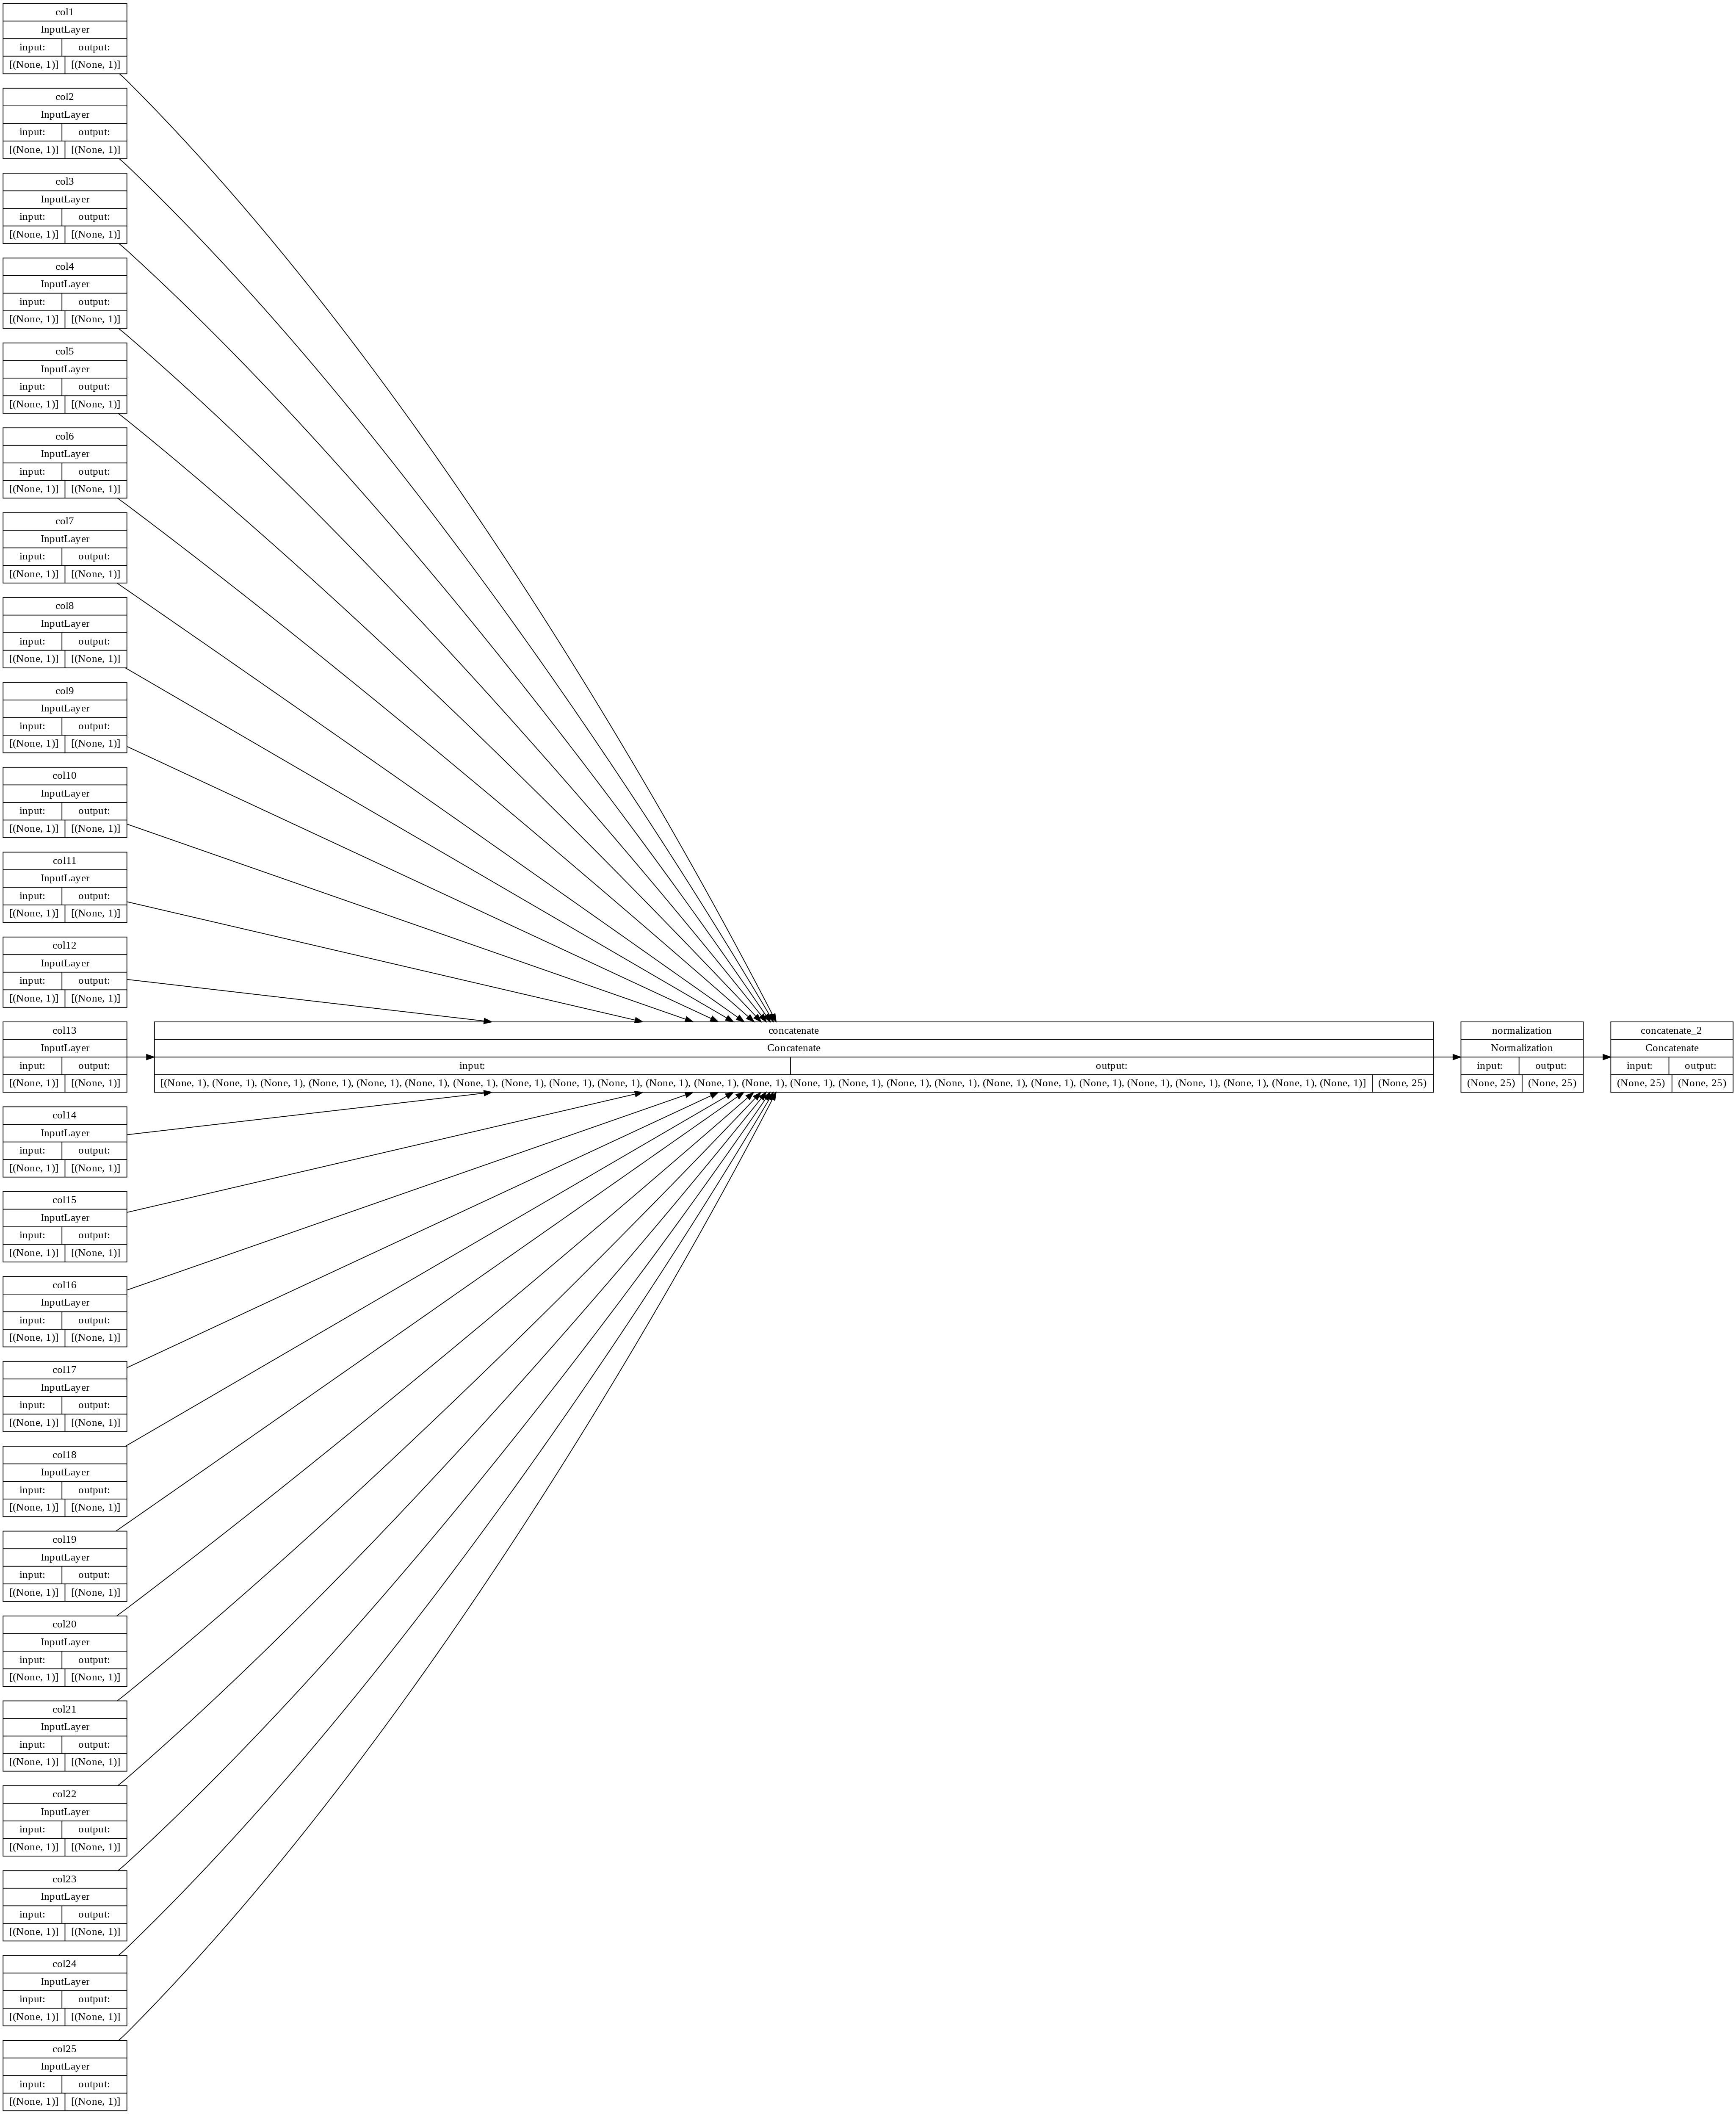

In [19]:
preprocessed_inputs_cat = keras.layers.Concatenate()(preprocessed_inputs)
preprocessing_layer = tf.keras.Model(inputs, preprocessed_inputs_cat, name="ProcessData")

# this saves an image of the model, see note regarding plot_model issues
tf.keras.utils.plot_model(model=preprocessing_layer, rankdir="LR", dpi=130, show_shapes=True, to_file="processing.png")

In [24]:
# # deal with string features
# for name, input in inputs.items():
#     if input.dtype != tf.string:
#         continue

#     lookup = preprocessing.StringLookup(vocabulary=np.unique(items_features[name]))
#     one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

#     x = lookup(input)
#     x = one_hot(x)
#     preprocessed_inputs.append(x) # append preprocessed feature to features list
    
# preprocessed_inputs

[<KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'normalization')>]

In [20]:
items_features_dict = {name: np.array(value) for name, value in items_features.items()}

# grab two samples
two_sample_dict = {name:values[1:3, ] for name, values in items_features_dict.items()}
two_sample_dict

{'col1': array([2036., 2117.]),
 'col10': array([454., 605.]),
 'col11': array([13686., 10360.]),
 'col12': array([10470.,  8574.]),
 'col13': array([388., 730.]),
 'col14': array([1803., 3214.]),
 'col15': array([429., 961.]),
 'col16': array([8631., 8654.]),
 'col17': array([579., 689.]),
 'col18': array([553., 377.]),
 'col19': array([148., 147.]),
 'col2': array([2031., 1281.]),
 'col20': array([ 90., 134.]),
 'col21': array([8625., 8645.]),
 'col22': array([581., 696.]),
 'col23': array([548., 377.]),
 'col24': array([153., 148.]),
 'col25': array([ 92., 134.]),
 'col3': array([379., 666.]),
 'col4': array([ 675., 1246.]),
 'col5': array([5751., 4471.]),
 'col6': array([434., 742.]),
 'col7': array([ 806., 1131.]),
 'col8': array([1313., 1782.]),
 'col9': array([1876., 2461.])}

In [22]:
# apply the preprocessing layer
two_sample_fitted = preprocessing_layer(two_sample_dict)

two_sample_fitted

<tf.Tensor: shape=(2, 25), dtype=float32, numpy=
array([[-1.0265234 ,  2.2856116 , -0.6754388 , -1.1393607 ,  2.3464983 ,
        -1.3391318 , -1.1714461 , -1.306879  , -1.4106771 , -1.1609852 ,
         2.9518054 ,  2.357571  , -0.29952565,  0.00923454, -0.4172676 ,
         0.03138614, -1.1303172 ,  1.7676668 , -0.42802298,  0.39798865,
         0.08732716, -1.1968715 ,  1.6980633 , -0.40125155,  0.4383931 ],
       [-0.7550136 , -0.38652518,  0.05838206, -0.17542583,  1.1415452 ,
        -0.66460294, -0.5530775 , -0.6852778 , -0.77113056, -0.45787603,
         1.2622895 ,  1.2071489 ,  0.66688514,  1.2844571 ,  0.8661595 ,
         0.10316768, -0.610348  ,  0.5898853 , -0.43653858,  1.4722393 ,
         0.14966239, -0.65888834,  0.5664275 , -0.44326252,  1.4602782 ]],
      dtype=float32)>

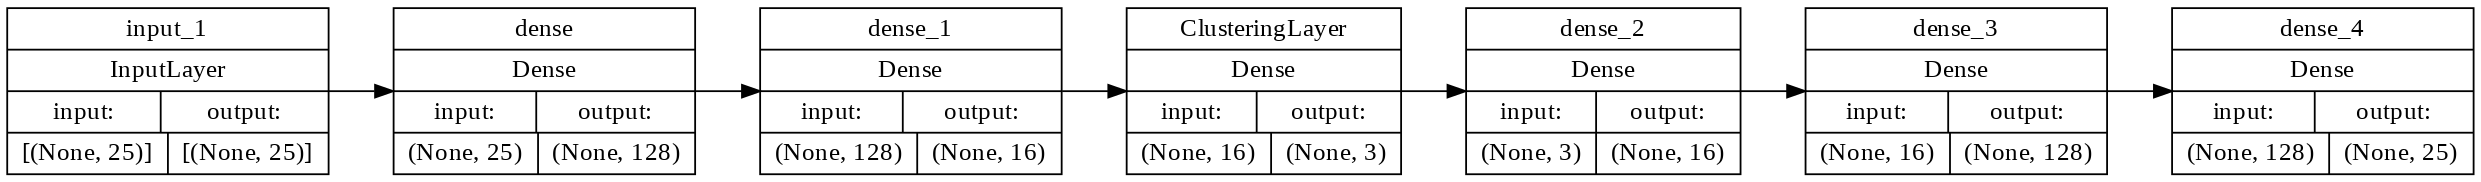

In [25]:
# This is the size of our input data
full_dim = two_sample_fitted.shape.as_list()[1]

# these are the downsampling/upsampling dimensions
encoding_dim1 = 128
encoding_dim2 = 16
encoding_dim3 = 3 # we will use these 3 dimensions for clustering

# This is our encoder input
encoder_input_data = keras.Input(shape=(full_dim,))

# the encoded representation of the input
encoded_layer1 = keras.layers.Dense(encoding_dim1, activation='relu')(encoder_input_data)
encoded_layer2 = keras.layers.Dense(encoding_dim2, activation='relu')(encoded_layer1)
# Note that encoded_layer3 is our 3 dimensional "clustered" layer, which we will later use for clustering
encoded_layer3 = keras.layers.Dense(encoding_dim3, activation='relu', name="ClusteringLayer")(encoded_layer2)

encoder_model = keras.Model(encoder_input_data, encoded_layer3)

# the reconstruction of the input
decoded_layer3 = keras.layers.Dense(encoding_dim2, activation='relu')(encoded_layer3)
decoded_layer2 = keras.layers.Dense(encoding_dim1, activation='relu')(decoded_layer3)
decoded_layer1 = keras.layers.Dense(full_dim, activation='sigmoid')(decoded_layer2)

# This model maps an input to its autoencoder reconstruction
autoencoder_model = keras.Model(encoder_input_data, outputs=decoded_layer1, name="Encoder")

# compile the model
autoencoder_model.compile(optimizer="RMSprop", loss=tf.keras.losses.mean_squared_error)
tf.keras.utils.plot_model(model=autoencoder_model, rankdir="LR", dpi=130, show_shapes=True, to_file="autoencoder.png")

In [26]:
p_labels = items_csv.dropna().status

In [41]:
# process the inputs
p_items = preprocessing_layer(items_features_dict)

# split into training and testing sets (80/20 split)
train_data, test_data, train_labels, test_labels = train_test_split(p_items.numpy(), p_labels, train_size=0.8, random_state=5)

# scale data
t = MinMaxScaler()
t.fit(train_data)
train_data = t.transform(train_data)
test_data = t.transform(test_data)

# fit the model using the training data
history = autoencoder_model.fit(train_data, train_data, epochs=300, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

Epoch 1/300
316/316 [==============================] - 1s 4ms/step - loss: 0.0551 - val_loss: 0.0391
Epoch 2/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0362 - val_loss: 0.0352
Epoch 3/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0338 - val_loss: 0.0315
Epoch 4/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0326 - val_loss: 0.0311
Epoch 5/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0315 - val_loss: 0.0302
Epoch 6/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0307 - val_loss: 0.0306
Epoch 7/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0302 - val_loss: 0.0296
Epoch 8/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0299 - val_loss: 0.0308
Epoch 9/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0297 - val_loss: 0.0300
Epoch 10/300
316/316 [==============================] - 1s 3ms/step - loss: 0.0296 - val_lo

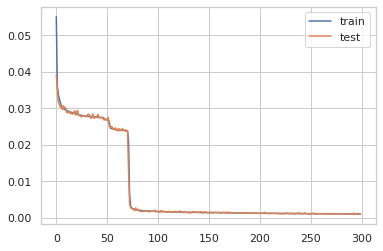

In [42]:
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [43]:
# define an encoder model (without the decoder)
from tensorflow.keras.utils import plot_model
# encoder = Model(inputs=encoder_input_data, outputs=bottleneck)
plot_model(autoencoder_model, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
autoencoder_model.save('encoder.h5')

In [47]:
# load the model from file
from tensorflow.keras.models import load_model

# scale data
t = MinMaxScaler()
t.fit(items_features)
X = t.transform(items_features)


encoder = load_model('encoder.h5')
# encode the data
X_encode = encoder.predict(X)



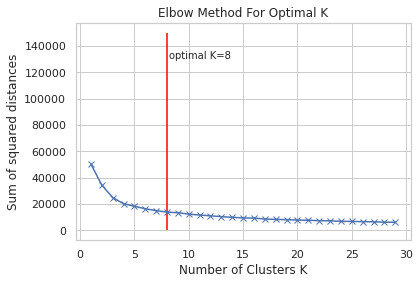

In [48]:
# choose number of clusters K:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.vlines(ymin=0, ymax=150000, x=8, colors='red')
plt.text(x=8.2, y=130000, s="optimal K=8")
plt.xlabel('Number of Clusters K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [49]:
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(X)
P = kmeans.predict(items_features)

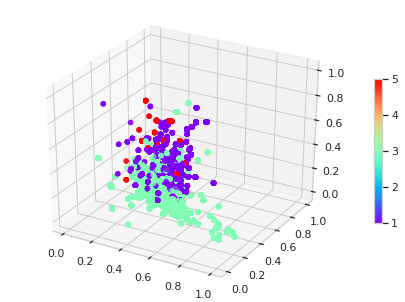

In [53]:
def rotate(angle):
    ax.view_init(azim=angle)
# visualize the clusters:
encoded_items = X
encoded_fig = plt.figure()
ax = Axes3D(encoded_fig)
p = ax.scatter(encoded_items[:,0], encoded_items[:,1], encoded_items[:,2], c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)
plt.show()

angle = 3
ani = animation.FuncAnimation(encoded_fig, rotate(3), frames=np.arange(0, 360, angle), interval=50)

In [65]:
! git clone https://github.com/YousefGh/kmeans-feature-importance.git
! mv "./kmeans-feature-importance/kmeans_interp/" "."
! pip install -r "kmeans-feature-importance/requirements.txt"

Cloning into 'kmeans-feature-importance'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 105 (delta 39), reused 88 (delta 22), pack-reused 0
Receiving objects: 100% (105/105), 2.82 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (39/39), done.
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [1]:
import pandas as pd, numpy as np
import seaborn as sns; sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

In [54]:
kms = KMeansInterp(n_clusters=8, 
                   random_state=1, 
                   ordered_feature_names=items_features.columns, 
                   feature_importance_method='wcss_min',
                  ).fit(X)

In [55]:
kms.feature_importances_[1][:10]

[('col16', 0.7946172154533557),
 ('col21', 0.7865323565810765),
 ('col11', 0.5735176209569918),
 ('col12', 0.5734672600457817),
 ('col5', 0.494162600227461),
 ('col1', 0.40719906235703085),
 ('col22', 0.40500968482516353),
 ('col17', 0.3931135093147136),
 ('col2', 0.3476976242683755),
 ('col10', 0.3451946196527357)]

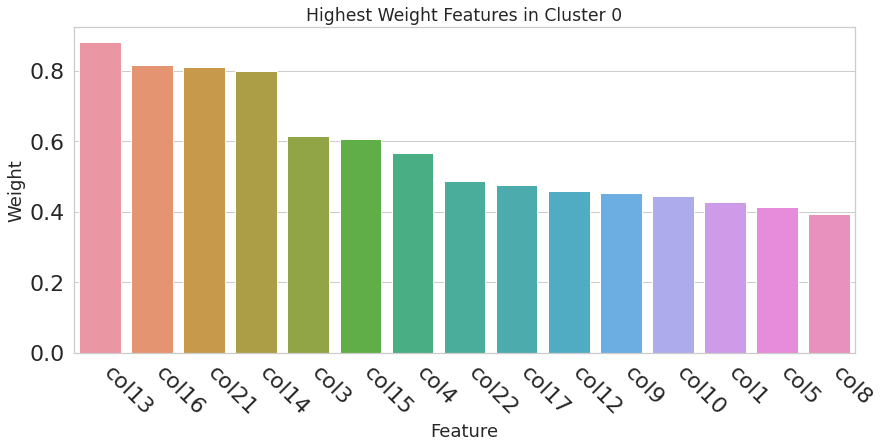

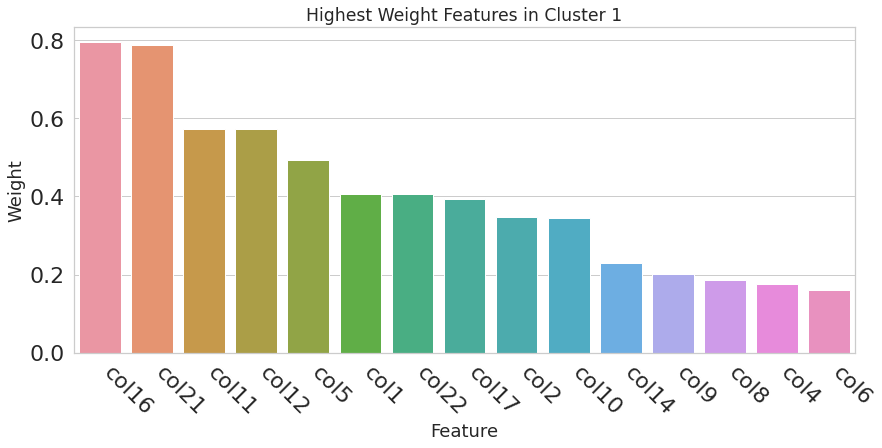

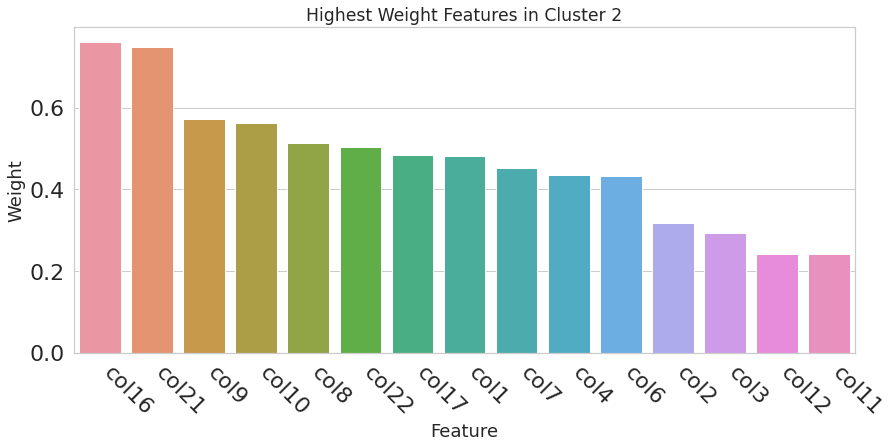

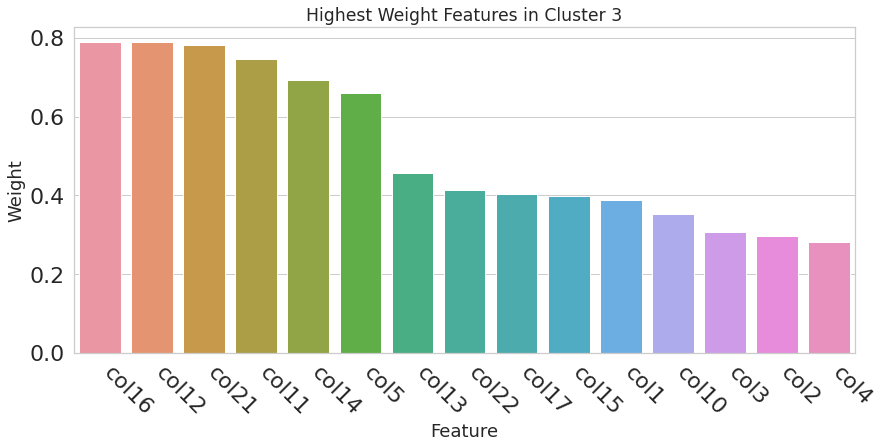

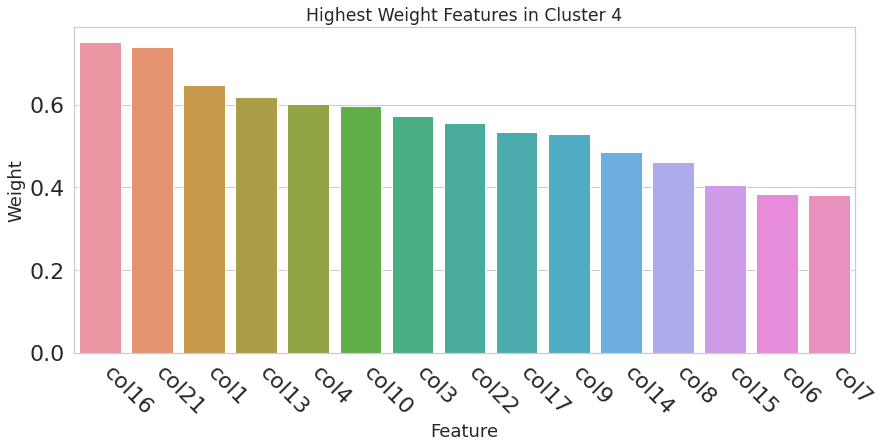

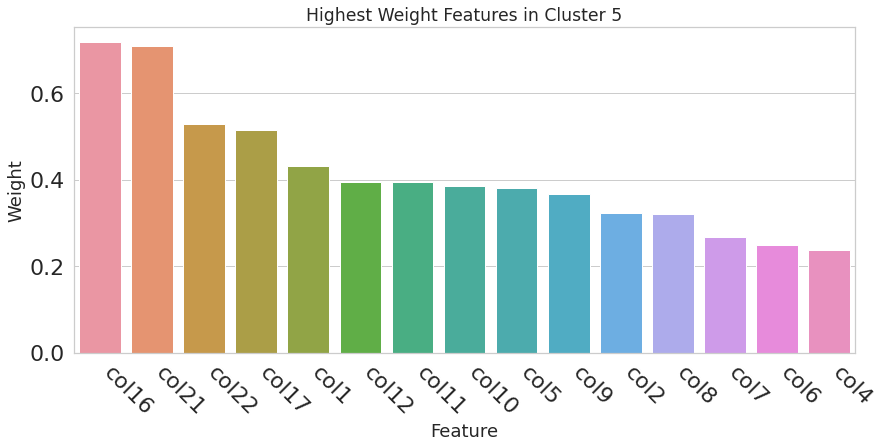

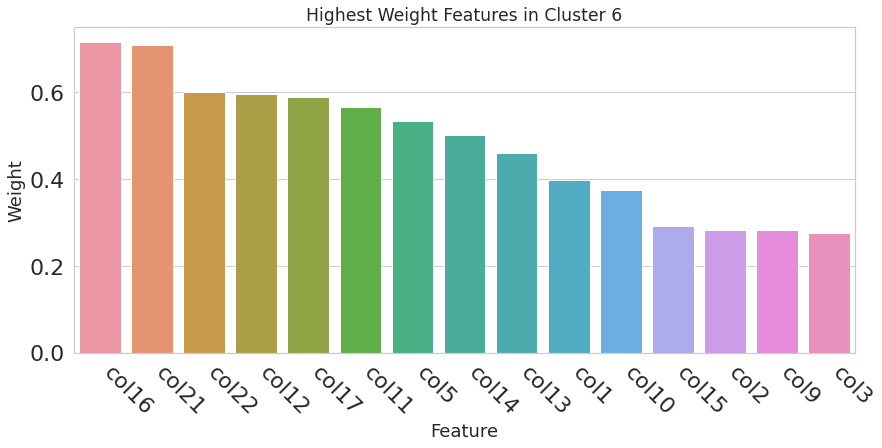

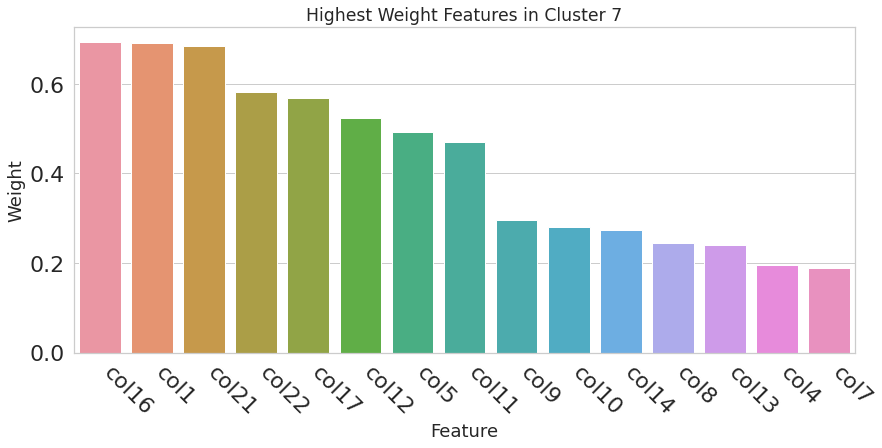

In [56]:
for cluster_label, feature_weights in kms.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();
    
    print('\n\n')

In [59]:
np.unique(kms.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [74]:
b = []
for feature in range(X.shape[1]):
    mean1 = X[kmeans.labels_==0][:,feature].mean()
    mean2 = X[kmeans.labels_==1][:,feature].mean()
    mean3 = X[kmeans.labels_==2][:,feature].mean()
    mean4 = X[kmeans.labels_==3][:,feature].mean()
    mean5 = X[kmeans.labels_==4][:,feature].mean()
    mean6 = X[kmeans.labels_==5][:,feature].mean()
    mean7 = X[kmeans.labels_==6][:,feature].mean() 
    mean8 = X[kmeans.labels_==7][:,feature].mean() 
    
    var1 = X[kmeans.labels_==0][:,feature].var()
    var2 = X[kmeans.labels_==1][:,feature].var()
    var3 = X[kmeans.labels_==2][:,feature].var()
    var4 = X[kmeans.labels_==3][:,feature].var()
    var5 = X[kmeans.labels_==4][:,feature].var()
    var6 = X[kmeans.labels_==5][:,feature].var()
    var7 = X[kmeans.labels_==6][:,feature].var()
    var8 = X[kmeans.labels_==7][:,feature].var()
    a = round((var1+var2+var3+var4+var5+var6+var7+var8),3)
    print('feature:',feature,'Total Variance:',a)
    b.append(a)

feature: 0 Total Variance: 0.088
feature: 1 Total Variance: 0.03
feature: 2 Total Variance: 0.061
feature: 3 Total Variance: 0.048
feature: 4 Total Variance: 0.065
feature: 5 Total Variance: 0.027
feature: 6 Total Variance: 0.029
feature: 7 Total Variance: 0.03
feature: 8 Total Variance: 0.035
feature: 9 Total Variance: 0.059
feature: 10 Total Variance: 0.04
feature: 11 Total Variance: 0.049
feature: 12 Total Variance: 0.072
feature: 13 Total Variance: 0.062
feature: 14 Total Variance: 0.05
feature: 15 Total Variance: 0.024
feature: 16 Total Variance: 0.09
feature: 17 Total Variance: 0.03
feature: 18 Total Variance: 0.006
feature: 19 Total Variance: 0.005
feature: 20 Total Variance: 0.024
feature: 21 Total Variance: 0.093
feature: 22 Total Variance: 0.035
feature: 23 Total Variance: 0.006
feature: 24 Total Variance: 0.005


In [77]:
b

[0.088,
 0.03,
 0.061,
 0.048,
 0.065,
 0.027,
 0.029,
 0.03,
 0.035,
 0.059,
 0.04,
 0.049,
 0.072,
 0.062,
 0.05,
 0.024,
 0.09,
 0.03,
 0.006,
 0.005,
 0.024,
 0.093,
 0.035,
 0.006,
 0.005]

In [83]:
df2 = pd.DataFrame(list(items_features.columns),columns=['column name'])

In [89]:
df1 = pd.DataFrame(b, columns=['values'])
df2 = pd.DataFrame(list(items_features.columns),columns=['features'])
df3 = pd.concat([df2,df1],axis=1)

In [91]:
df3.sort_values(by=['values'],ascending=False)

,features,values
21,col22,0.093
16,col17,0.090
0,col1,0.088
12,col13,0.072
4,col5,0.065
13,col14,0.062
2,col3,0.061
9,col10,0.059
14,col15,0.050
11,col12,0.049
